In [24]:
import pandas as pd
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import re
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn import tree
import pickle
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [2]:
with open("ccdf3.pkl", 'rb') as picklefile: 
    ccdf = pickle.load(picklefile)

In [3]:
with open("ccdf_upsampled_test.pkl", 'rb') as picklefile: 
    ccdf_up_test = pickle.load(picklefile)
    
    
X_up_test = ccdf_up_test.drop('default',1)
y_up_test = ccdf_up_test.default

In [4]:
with open("ccdf_upsampled_train.pkl", 'rb') as picklefile: 
    ccdf_up = pickle.load(picklefile)

In [5]:
with open("ccdf_downsampled.pkl", 'rb') as picklefile: 
    ccdf_down = pickle.load(picklefile)

In [6]:
X = ccdf.drop('default',1)
y = ccdf['default']

X_up = ccdf_up.drop('default',1)
y_up = ccdf_up['default']

X_down = ccdf_down.drop('default',1)
y_down = ccdf_down['default']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(X_down, y_down, test_size=0.3, random_state=1234)

In [40]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
#Decision tree classifier
gnb = BernoulliNB()
fit = gnb.fit(X_up, y_up)
yhat = fit.predict(X_up_test)
gnb_score = fit.score(X_up_test, y_up_test)
print(gnb_score)

0.676845903371


Text(0,0.5,'TPR')

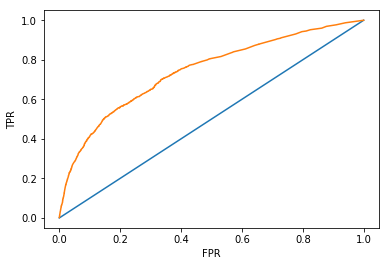

In [103]:
# What about ROC ? 
y_up_score=gnb.predict_proba(X_up_test)[:,1]

fpr_up, tpr_up,_ = roc_curve(y_up_test, y_up_score)
roc_auc_up = auc(fpr_up, tpr_up)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_up,tpr_up)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [104]:
roc_auc_up

0.74198755711152353

In [105]:
def predict_with_cutoff(y_prob, threshold):
    y_pred = [1 if x >= threshold else 0 for x in y_prob]
    return y_pred

In [106]:
def cost(tn, fp, fn, tp):
    cost = (tn) + (tp * .05) + (fp * .05) 
    return cost

In [123]:
m = np.linspace(0,1,1e4)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [124]:
yhat = []
y_score = gnb.predict_proba(X_up_test)[:,1]
for i in m:
    yhat.append(predict_with_cutoff(y_score, i))

In [125]:
cost_list = []
for i in yhat:
    tn, fp, fn, tp=confusion_matrix(y_up_test, i, labels=None).ravel()
    cost_list.append(cost(tn, fp, fn, tp))

In [126]:
index = 0
for i in cost_list:
    if max(cost_list) == i:
        ind = index
        index = index + 1
    else:
        index = index + 1

In [127]:
max(cost_list)

11363.0

In [128]:
m[ind]

1.0

In [129]:
yhat_up = predict_with_cutoff(y_score, m[ind])

[[11363     0]
 [11363     0]]


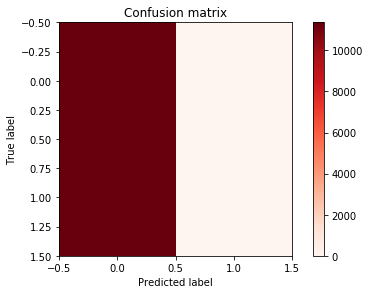

In [130]:
cm=confusion_matrix(y_up_test, yhat_up, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)